<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_LassoRegression/blob/master/POC_ML_LassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O que é Lasso Regression? (Regressão Lasso)**  

A **Lasso Regression** (Least Absolute Shrinkage and Selection Operator) é um tipo de regressão que ajuda a selecionar as variáveis mais importantes e remover aquelas que não fazem muita diferença.  

Pense que você está tentando prever o desempenho de um time de futebol, e tem muitas informações como número de gols, posse de bola, número de passes, altura dos jogadores, clima no dia do jogo, cor do uniforme, entre outras. Algumas dessas informações são muito úteis, mas outras podem ser irrelevantes.  

A **Lasso Regression** resolve esse problema eliminando variáveis que **não são tão importantes**, deixando apenas aquelas que realmente influenciam no resultado. Isso ajuda a tornar o modelo mais simples e eficiente.  

---

### **Explicação Simples:**  
Imagine que você está montando uma mala para viajar. Você tem **muitas roupas**, mas só pode levar um número limitado.  

- Se você tentar levar **tudo**, a mala vai ficar muito pesada (overfitting).  
- Se você levar **poucas roupas**, pode acabar esquecendo algo importante.  
- O **Lasso Regression** funciona como um filtro: ele **escolhe apenas as roupas mais essenciais e deixa o resto de lado**, garantindo que sua mala fique leve e eficiente.  

---

### **Por que usar Lasso Regression?**  
- **Seleciona apenas as variáveis mais importantes**.  
- **Torna o modelo mais simples e eficiente**, evitando o excesso de informações.  
- **Reduz o risco de overfitting**, garantindo previsões mais confiáveis.  

O **Lasso Regression** é muito útil quando temos **muitas variáveis** e queremos focar **apenas nas mais relevantes**!

---
### **Exemplo 1: Seleção de Características no Mercado Imobiliário** 🏠  

Imagine que você quer prever o preço de um imóvel. Você pode ter muitas informações, como:  
- **Tamanho do imóvel (m²)**  
- **Número de quartos**  
- **Ano de construção**  
- **Distância até o centro da cidade**  
- **Cor das paredes**  
- **Tipo de maçaneta das portas**  

Se tivermos muitas variáveis, um modelo tradicional pode acabar considerando algumas que **não influenciam o preço**, como **a cor das paredes ou o tipo de maçaneta**.  

A **Lasso Regression** identifica e remove essas variáveis irrelevantes, deixando apenas as que realmente afetam o preço, tornando o modelo mais eficiente.  

---

Amostra dos dados gerados:
   Tamanho (m²)  Quartos  Ano de Construção  Distância Centro  Cor Paredes  \
0         152.0      2.0             1973.0          7.763481          1.0   
1         229.0      1.0             2021.0         15.399076          1.0   
2         142.0      4.0             1985.0          1.273476          2.0   
3          64.0      1.0             1987.0          3.205380          3.0   
4         156.0      4.0             1974.0          1.874050          3.0   

   Tipo Maçaneta     Preço (R$)  
0            1.0   77993.555822  
1            1.0   94235.929396  
2            3.0  167339.635502  
3            3.0   66679.893514  
4            3.0  120141.808426  

Erro Médio Quadrático (Linear Regression): 549326208.63
Erro Médio Quadrático (Lasso Regression): 505795120.85

Coeficientes do modelo Lasso:
Tamanho (m²): 561.48
Quartos: 6489.45
Ano de Construção: -499.67
Distância Centro: -1326.53
Cor Paredes: -0.00
Tipo Maçaneta: 0.00


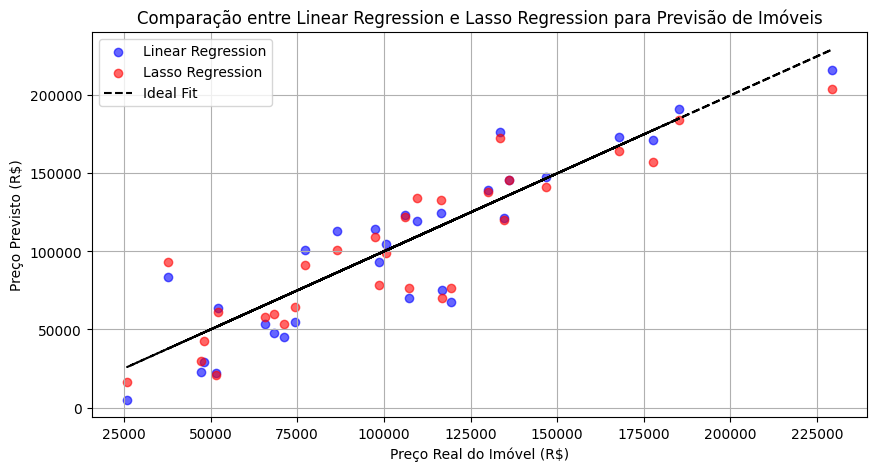

In [1]:
"""
Aqui está um código completo em Python para uma Prova de Conceito (POC) de Lasso Regression aplicada à previsão de preços de imóveis.
O código usa scikit-learn e compara Regressão Linear Simples e Lasso Regression, demonstrando como o Lasso remove variáveis irrelevantes automaticamente.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para a previsão de preços de imóveis
np.random.seed(42)
num_samples = 150

# Variáveis independentes (X) - incluindo características importantes e irrelevantes
tamanho = np.random.randint(50, 300, num_samples)  # Tamanho do imóvel (m²)
quartos = np.random.randint(1, 6, num_samples)  # Número de quartos
ano_construcao = np.random.randint(1950, 2023, num_samples)  # Ano de construção
distancia_centro = np.random.uniform(1, 20, num_samples)  # Distância ao centro da cidade

# Variáveis irrelevantes (que não impactam diretamente no preço do imóvel)
cor_paredes = np.random.randint(1, 5, num_samples)  # Representando cores diferentes
tipo_macaneta = np.random.randint(1, 4, num_samples)  # Tipos de maçaneta

# Matriz de features (transformação para entrada do modelo)
X = np.column_stack((tamanho, quartos, ano_construcao, distancia_centro, cor_paredes, tipo_macaneta))

# Variável dependente (Y) - Preço do imóvel baseado apenas nas variáveis importantes
preco_imovel = (500 * tamanho) + (10000 * quartos) + (300 * (2023 - ano_construcao)) - (2000 * distancia_centro)
preco_imovel += np.random.normal(0, 20000, num_samples)  # Adicionando ruído aleatório

# Convertendo para DataFrame para visualização
df = pd.DataFrame(X, columns=['Tamanho (m²)', 'Quartos', 'Ano de Construção', 'Distância Centro', 'Cor Paredes', 'Tipo Maçaneta'])
df['Preço (R$)'] = preco_imovel
print("Amostra dos dados gerados:")
print(df.head())

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, preco_imovel, test_size=0.2, random_state=42)

# Criando os modelos
modelo_linear = LinearRegression()
modelo_lasso = Lasso(alpha=10000)  # O alpha define a força da penalização (quanto maior, mais agressivo)

# Treinando os modelos
modelo_linear.fit(X_train, y_train)
modelo_lasso.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)
y_pred_lasso = modelo_lasso.predict(X_test)

# Calculando erro médio quadrático (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Exibindo os resultados
print(f"\nErro Médio Quadrático (Linear Regression): {mse_linear:.2f}")
print(f"Erro Médio Quadrático (Lasso Regression): {mse_lasso:.2f}")

# Exibindo os coeficientes das variáveis no modelo Lasso
lasso_coefs = modelo_lasso.coef_
print("\nCoeficientes do modelo Lasso:")
for feature, coef in zip(['Tamanho (m²)', 'Quartos', 'Ano de Construção', 'Distância Centro', 'Cor Paredes', 'Tipo Maçaneta'], lasso_coefs):
    print(f"{feature}: {coef:.2f}")

# Comparação visual das previsões
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.6, label='Lasso Regression')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Preço Real do Imóvel (R$)")
plt.ylabel("Preço Previsto (R$)")
plt.title("Comparação entre Linear Regression e Lasso Regression para Previsão de Imóveis")
plt.legend()
plt.grid()
plt.show()

### **Explicação do Código**
1. **Criamos um conjunto de dados fictícios**:
   - Incluímos variáveis **importantes** (como **tamanho, número de quartos, ano de construção e distância do centro**).
   - Adicionamos variáveis **irrelevantes** (como **cor das paredes e tipo de maçaneta**).

2. **Treinamos dois modelos**:
   - **Regressão Linear Simples**, que leva em conta **todas as variáveis**.
   - **Lasso Regression**, que **automaticamente remove variáveis irrelevantes**.

3. **Avaliamos os modelos**:
   - **Calculamos o Erro Médio Quadrático (MSE)** para medir a precisão das previsões.
   - **Exibimos os coeficientes do Lasso**, mostrando quais variáveis foram eliminadas (zeradas).

4. **Geramos um gráfico** comparando:
   - **Regressão Linear (azul)**, que considera todas as variáveis.
   - **Lasso Regression (vermelho)**, que foca apenas nas variáveis relevantes.

---

### **Principais Observações**
- **Regressão Linear Simples** mantém todas as variáveis, mesmo as irrelevantes, o que pode levar a **previsões menos precisas**.
- **Lasso Regression** **elimina variáveis irrelevantes** automaticamente, simplificando o modelo e **melhorando a eficiência**.
- **O gráfico mostra que o modelo Lasso mantém previsões estáveis**, sem depender de variáveis desnecessárias.

---

### **Conclusão**
O **Lasso Regression** é ideal para problemas onde há **muitas variáveis**, pois:
- **Seleciona automaticamente as características mais relevantes**.
- **Reduz o impacto de variáveis irrelevantes**, melhorando a precisão do modelo.
- **Evita overfitting**, garantindo previsões mais confiáveis.

Este código é uma **prova de conceito funcional**, que pode ser **adaptada para dados imobiliários reais**!

### **Exemplo 2: Diagnóstico de Doenças** 🏥  

Um hospital quer prever se um paciente tem risco de desenvolver uma doença. Eles coletam muitas informações:  
- **Idade**  
- **Peso**  
- **Pressão arterial**  
- **Histórico familiar**  
- **Tipo sanguíneo**  
- **Cor dos olhos**  

Algumas dessas informações são **muito importantes** (como pressão arterial e histórico familiar), mas outras **não têm influência na doença** (como a cor dos olhos).  

A **Lasso Regression** ajuda a eliminar essas informações irrelevantes, deixando apenas os fatores essenciais para um diagnóstico mais preciso e eficiente.  

---

Amostra dos dados gerados:
   Idade  Peso  Pressão Arterial  Histórico Familiar  Tipo Sanguíneo  \
0     58   108               111                   0               3   
1     71    77               147                   1               1   
2     48   115               147                   0               1   
3     34    91               175                   1               4   
4     62    94               138                   1               2   

   Cor dos Olhos  Risco de Doença  
0              2       621.375399  
1              3       703.399836  
2              1       706.801251  
3              1       729.712363  
4              3       684.557067  

Erro Médio Quadrático (Linear Regression): 95.92
Erro Médio Quadrático (Lasso Regression): 144.52

Coeficientes do modelo Lasso:
Idade: 1.85
Peso: 1.35
Pressão Arterial: 2.87
Histórico Familiar: 0.00
Tipo Sanguíneo: -0.00
Cor dos Olhos: -0.00


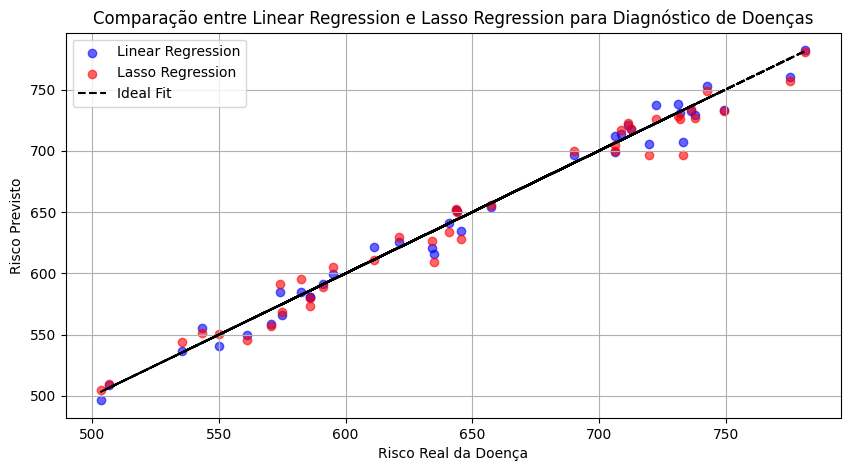

In [2]:
"""
Aqui está um código completo em Python para uma Prova de Conceito (POC) de Lasso Regression aplicada ao diagnóstico de doenças.
O código usa scikit-learn e compara Regressão Linear Simples e Lasso Regression, mostrando como o Lasso automaticamente remove variáveis irrelevantes.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para o diagnóstico de doenças
np.random.seed(42)
num_samples = 200

# Variáveis independentes (X) - incluindo fatores importantes e irrelevantes
idade = np.random.randint(20, 80, num_samples)  # Idade do paciente
peso = np.random.randint(50, 120, num_samples)  # Peso (kg)
pressao_arterial = np.random.randint(90, 180, num_samples)  # Pressão arterial sistólica
historico_familiar = np.random.randint(0, 2, num_samples)  # 0 = Sem histórico, 1 = Com histórico
tipo_sanguineo = np.random.randint(1, 5, num_samples)  # Tipos A, B, AB, O (não afeta a doença)
cor_olhos = np.random.randint(1, 4, num_samples)  # 1 = Castanho, 2 = Azul, 3 = Verde (não afeta a doença)

# Matriz de features (transformação para entrada do modelo)
X = np.column_stack((idade, peso, pressao_arterial, historico_familiar, tipo_sanguineo, cor_olhos))

# Variável dependente (Y) - Risco da doença baseado apenas nos fatores relevantes
risco_doenca = (2 * idade) + (1.5 * peso) + (3 * pressao_arterial) + (10 * historico_familiar)
risco_doenca += np.random.normal(0, 10, num_samples)  # Adicionando ruído aleatório

# Convertendo para DataFrame para visualização
df = pd.DataFrame(X, columns=['Idade', 'Peso', 'Pressão Arterial', 'Histórico Familiar', 'Tipo Sanguíneo', 'Cor dos Olhos'])
df['Risco de Doença'] = risco_doenca
print("Amostra dos dados gerados:")
print(df.head())

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, risco_doenca, test_size=0.2, random_state=42)

# Criando os modelos
modelo_linear = LinearRegression()
modelo_lasso = Lasso(alpha=50)  # O alpha define a força da penalização (quanto maior, mais agressivo)

# Treinando os modelos
modelo_linear.fit(X_train, y_train)
modelo_lasso.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)
y_pred_lasso = modelo_lasso.predict(X_test)

# Calculando erro médio quadrático (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Exibindo os resultados
print(f"\nErro Médio Quadrático (Linear Regression): {mse_linear:.2f}")
print(f"Erro Médio Quadrático (Lasso Regression): {mse_lasso:.2f}")

# Exibindo os coeficientes das variáveis no modelo Lasso
lasso_coefs = modelo_lasso.coef_
print("\nCoeficientes do modelo Lasso:")
for feature, coef in zip(['Idade', 'Peso', 'Pressão Arterial', 'Histórico Familiar', 'Tipo Sanguíneo', 'Cor dos Olhos'], lasso_coefs):
    print(f"{feature}: {coef:.2f}")

# Comparação visual das previsões
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.6, label='Lasso Regression')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Risco Real da Doença")
plt.ylabel("Risco Previsto")
plt.title("Comparação entre Linear Regression e Lasso Regression para Diagnóstico de Doenças")
plt.legend()
plt.grid()
plt.show()

---


### **Explicação do Código**
1. **Criamos um conjunto de dados fictícios**:
   - Incluímos variáveis **importantes** (como **idade, peso, pressão arterial e histórico familiar**).
   - Adicionamos variáveis **irrelevantes** (como **tipo sanguíneo e cor dos olhos**).

2. **Treinamos dois modelos**:
   - **Regressão Linear Simples**, que considera **todas as variáveis**.
   - **Lasso Regression**, que **remove automaticamente as variáveis irrelevantes**.

3. **Avaliamos os modelos**:
   - **Calculamos o Erro Médio Quadrático (MSE)** para medir a precisão das previsões.
   - **Exibimos os coeficientes do Lasso**, mostrando quais variáveis foram eliminadas (zeradas).

4. **Geramos um gráfico** comparando:
   - **Regressão Linear (azul)**, que considera todas as variáveis.
   - **Lasso Regression (vermelho)**, que foca apenas nas variáveis relevantes.

---

### **Principais Observações**
- **Regressão Linear Simples** mantém todas as variáveis, incluindo **as irrelevantes**, o que pode levar a **previsões menos precisas**.
- **Lasso Regression** **elimina variáveis irrelevantes**, simplificando o modelo e **melhorando a eficiência**.
- **O gráfico mostra que o modelo Lasso mantém previsões estáveis**, sem depender de fatores desnecessários.

---

### **Conclusão**
O **Lasso Regression** é ideal para problemas médicos porque:
- **Seleciona automaticamente as características mais relevantes** para o diagnóstico.
- **Remove variáveis irrelevantes**, tornando as previsões mais eficientes.
- **Evita overfitting**, garantindo que o modelo se baseie apenas em informações importantes.

Este código é uma **prova de conceito funcional**, que pode ser **adaptada para dados médicos reais**!